## CLT & Linear Statistical Model 구현

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
np.random.seed(1) 

1. Central Limit Theorem (CLT)에 대해서 실습해보겠습니다.

다음 빈칸을 한번 채워보세요.

n이 늘어날수록, 점점 normal 분포에 가까워지는 모습을 확인해보세요.

In [6]:
# CLT Example 예제 구현

def random_sample(num_sample,n,beta):
    sample_mean_list = [] 
    for _ in range(num_sample):
        drawn_sample = np.random.exponential(scale=beta,size=n)
        drawn_sample_mean = np.mean(drawn_sample)
        sample_mean_list.append(drawn_sample_mean)
        # 처음 정의한 sample_mean_list 리스트에다가
        ## drawn_sample_mean을 루프돌면서 계속 저장
    return sample_mean_list 

(array([ 56., 169., 257., 208., 157.,  88.,  38.,  20.,   5.,   2.]),
 array([ 1.3377216 ,  3.93246886,  6.52721612,  9.12196337, 11.71671063,
        14.31145789, 16.90620514, 19.5009524 , 22.09569966, 24.69044691,
        27.28519417]),
 <BarContainer object of 10 artists>)

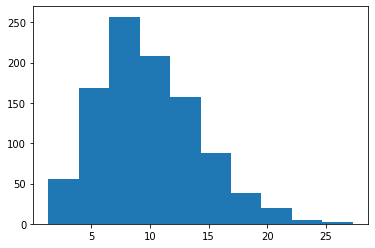

In [7]:
sample_mean_list = random_sample(1000,5,10) # n=5
plt.hist(sample_mean_list,density=False)

(array([  2.,  35., 110., 227., 230., 203., 111.,  60.,  14.,   8.]),
 array([ 4.27543755,  5.5139805 ,  6.75252345,  7.9910664 ,  9.22960934,
        10.46815229, 11.70669524, 12.94523819, 14.18378114, 15.42232409,
        16.66086704]),
 <BarContainer object of 10 artists>)

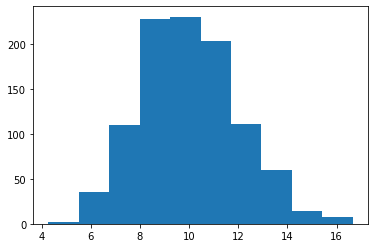

In [9]:
sample_mean_list = random_sample(1000,25,10) # n=25
plt.hist(sample_mean_list,density=False)

# skewness가 줄어들고 Normal dist에 가까워지는 것을 확인할 수 있음

이번에는 Unbiased 와 Biased Estimator에 대해서 한번 실습해보겠습니다.

Uniform 분포에서 한번 뽑아보는 것으로 가정해볼게요.

2-(a): Population Distribution이 Unif(0,1)인 경우에, population variance 추정 <br>
Uniform(0,1)에서 n (n=2,3,...,100) 개의 sample을 추출하세요. <br>
n개의 sample에 대한 biased sample variance와 unbiased sample variance를 구하세요. <br>
population variance (Ground Truth), biased sample variance, unbiased sample variance를 n에 따라서 plot 해보세요. <br>
그리고 여러번 실행해보세요. 뭐가 좋은지 한번 판단해보세요!

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Sample variance')

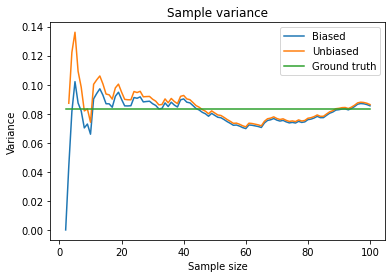

In [24]:
# 불편추정량 예시
num_sample = 100
uniform_sample = np.random.uniform(low=0.0, high=1.0, size=num_sample) #uniform 분포에서 샘플링하겠다
biased_sample_var_list = []
unbiased_sample_var_list = []
# 편향, 불편향 샘플 리스트 정의해주고

for n in range(1,num_sample):
    # n번째 루프에서 n번째 샘플까지만 분산 구하는 것 ! 
    biased_sample_var = np.var(uniform_sample[:n],ddof=0) #분모가 n
    unbiased_sample_var = np.var(uniform_sample[:n],ddof=1) #분모가 n-1
    biased_sample_var_list.append(biased_sample_var)
    unbiased_sample_var_list.append(unbiased_sample_var)
    
x = np.arange(2,num_sample+1)
plt.plot(x, biased_sample_var_list, label="Biased")
plt.plot(x, unbiased_sample_var_list, label="Unbiased")
plt.plot(x, [1/12]*len(x), label="Ground truth")
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.legend()
plt.title("Sample variance")

# 이 문제에서는 expectation(평균)을 따로 구한 것은 없었음, variance만 구하고 있었지

2-(b): 위 (a)번의 반복실험 <br>
위에서 biased 와 unbiased 중 어느것이 더좋은 estimator 인 것 같나요? <br>
잘 구분이 안가나요? <br>
이번에는 그럼 위 과정을 10000번 반복해봅시다. (위에서 작성한 코드를 재활용해보세요.) <br>
(즉, 다음이 성립하는지 확인 $ E[\widehat{\theta}]=\theta $)

(100, 10000)


Text(0.5, 1.0, 'Sample variance')

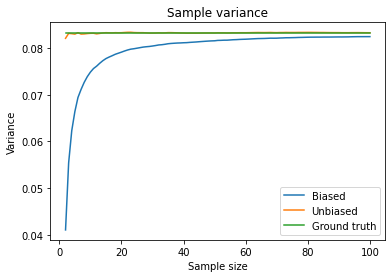

In [34]:
# 불편추정치 여부 확인을 위해 기댓값 계산을 해보자 !
num_sample = 100
num_repeat = 10000 #아 10000번 반복할건가 보다 => 100*10000 matrix 출력
uniform_sample = np.random.uniform(low = 0.0, high = 1.0, size = [num_sample,num_repeat])
biased_sample_var_list = []
unbiased_sample_var_list = []

print(uniform_sample.shape)
for n in range(2,num_sample+1):
    biased_sample_var = np.var(uniform_sample[:n,:],axis=0,ddof=0).mean() #행마다 10,000개의 값에 대한 분산의 기댓값(평균)
    # 2-(a)는 1차원 벡터의 n번째까지만 출력하면 되었는데, 2-(b)는 10,000개의 열을 추가로 고려해야 하기에 [:n, :]으로 써줘야 함
    unbiased_sample_var = np.var(uniform_sample[:n,:],axis=0,ddof=1).mean()
    biased_sample_var_list.append(biased_sample_var)
    unbiased_sample_var_list.append(unbiased_sample_var)
    
x = np.arange(2,num_sample+1)
plt.plot(x, biased_sample_var_list, label="Biased")
plt.plot(x, unbiased_sample_var_list, label="Unbiased")
plt.plot(x, [1/12]*len(x), label="Ground truth")
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.legend()
plt.title("Sample variance")

3. 이제는 simple linear statistical model의 beta를 추정해보겠습니다.

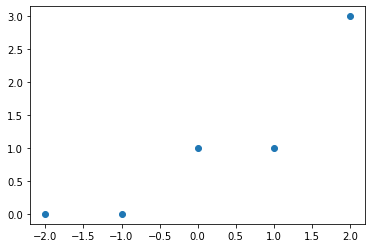

In [ ]:
x = np.array([-2,-1,0,1,2])
y = np.array([0,0,1,1,3])

plt.scatter(x,y)
plt.show()

3-1. beta hat 1을 추정하고자 합니다. $\widehat{\beta}_{1}$

우선 $s_{xx}$를 구해보세요.

In [ ]:
# sse 페이지의 beta_hat 공식 구현 야무지네
x_mean = np.mean(x)
sxx = ?????
print(sxx)

10.0


3-2. 이번에는 $s_{xy}$를 구해보세요.

In [ ]:
y_mean = np.mean(y)
sxy = ?????
print(sxy)

7.0


3-3. beta hat 1을 구해보세요. $\widehat{\beta}_{1}$

In [ ]:
beta_hat1 = ?????
print(beta_hat1)

0.7


3-4. beta hat 0을 구해보세요. $\widehat{\beta}_{0}$

In [ ]:
beta_hat0 = ?????
print(beta_hat0)

1.0


3-5. 위에서 구한 beta_hat을 활용해서, y_hat ($\widehat{y}$) 을 구하고, y와 y_hat을 같이 plot 해보세요.

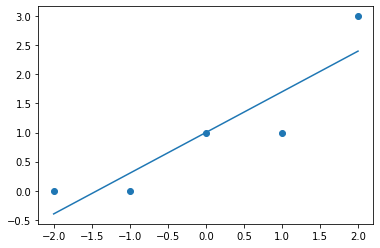

In [ ]:
y_hat = ?????
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.show()

3-6 이번에는 scipy내에 존재하는 linear regression 기능을 활용해서, $\widehat{\beta}_{0}$와 $\widehat{\beta}_{1}$를 구해보세요. 

In [ ]:
res = ?????.?????(x, y)
print(f"{res.intercept:.2f}", f"{res.slope:.2f}")

1.00 0.70
